# Examples of RProf analysis
This is the radial profile analysis for PPMstar version 2.

This notebook has been tested with PPMstarHub version 1.2.6.

In [1]:
%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


Use `inline` backend followed by `jupyter nbconvert rprof_demo.ipynb` on command line to create static html to document snap shot.

In [42]:
import os
import sys

# in case you want to use your own clone of PyPPM
# ppmpy_dir = "/user/niagara_scratch_fherwig/repos/PyPPM"
# sys.path.insert(0, ppmpy_dir)

from ppmpy import ppm

# print(inspect.getfile(ppm))

/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py


In [5]:
# for nice colors, linestyles, etc.
import nugridpy.utils as utils
import numpy as np
from matplotlib import pyplot as plt

cb = utils.linestylecb

import logging
import math

logging.getLogger("matplotlib").setLevel(logging.ERROR)

In [6]:
def list_columns(obj, cols=6, columnwise=True, gap=4):
    """
    Print the given list in evenly-spaced columns.

    Parameters
    ----------
    obj : list
        The list to be printed.
    cols : int
        The number of columns in which the list should be printed.
    columnwise : bool, default=True
        If True, the items in the list will be printed column-wise.
        If False the items in the list will be printed row-wise.
    gap : int
        The number of spaces that should separate the longest column
        item/s from the next column. This is the effective spacing
        between columns based on the maximum len() of the list items.
    """

    sobj = [str(item) for item in obj]
    if cols > len(sobj):
        cols = len(sobj)
    max_len = max([len(item) for item in sobj])
    if columnwise:
        cols = int(math.ceil(float(len(sobj)) / float(cols)))
    plist = [sobj[i : i + cols] for i in range(0, len(sobj), cols)]
    if columnwise:
        if not len(plist[-1]) == cols:
            plist[-1].extend([""] * (len(sobj) - len(plist[-1])))
        plist = zip(*plist)
    printer = "\n".join(["".join([c.ljust(max_len + gap) for c in p]) for p in plist])
    print(printer)

## Initialisation

In [7]:
dir_repo = "/data/ASDR/PPMstar"
dir_project = "LowZRAWD"
run = "N15-LowZRAWD-768-10x-burn-moms"
path = os.path.join(dir_repo, dir_project, run, "prfs")
rp_set = ppm.RprofSet(path)

3556 rprof files found in '/data/ASDR/PPMstar/LowZRAWD/N15-LowZRAWD-768-10x-burn-moms/prfs/.
Dump numbers range from 0 to 3555.


## Run history
In the `prfs` dir in the run dir there is one file ending with `.hstry` which containes a one line per dump history of the run. 

In [8]:
rp_hst = rp_set.get_history()

In [9]:
rp_hst.get_variables()

['NDump',
 'NCycle',
 'time(secs)',
 'time(mins)',
 'dt(secs)',
 'Courant',
 'MachNoMax',
 'TotalFlops',
 'TimeStamp']

In [10]:
list_columns(rp_hst.get("NDump")[:56], cols=12)

0     5     10    15    20    25    30    35    40    45    50    55    
1     6     11    16    21    26    31    36    41    46    51          
2     7     12    17    22    27    32    37    42    47    52          
3     8     13    18    23    28    33    38    43    48    53          
4     9     14    19    24    29    34    39    44    49    54          


### Wall clock time vs. dump number


/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9433: RuntimeWarning: divide by zero encountered in true_divide
  (np.roll(dumps, -1) - dumps)


(40.0, 75.0)

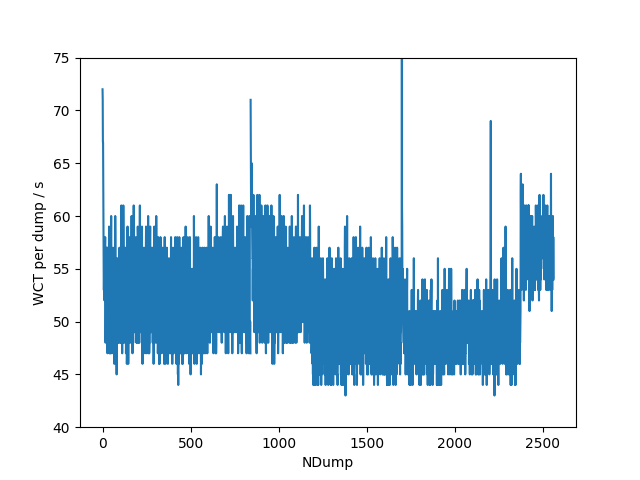

In [11]:
ifig = 1
plt.close(ifig)
plt.figure(ifig)
rp_hst.plot_wct_per_dump()
plt.ylim(40, 75)

### Get instance rprof for one dump
Each rprof dump file has header data, which holds all of the parameters of that run. Most of these parameters don't change throughout the run. But they may. 

In [12]:
rp = rp_set.get_dump(375)

In [13]:
list_columns(rp.get_header_variables(), cols=3)

airmu                         ifintel                       nvarstovisualize              
argsimg(1)                    ifmoms                        nViews                        
argsimg(10                    ifnotviolent                  NWorkersPerTeam               
argsimg(11                    ifnowriteback                 Nx                            
argsimg(12                    ifpmoms                       NXBricks                      
argsimg(13                    ifsimplechop                  NXBricksPerTeam               
argsimg(14                    ifsloflo                      NXTeams                       
argsimg(15                    ifsrend                       NYBricks                      
argsimg(16                    ifteambobs                    NYTeams                       
argsimg(17                    isstar                        NZBricks                      
argsimg(18                    lenbob8                       NZTeams                       

In [14]:
print("Nx = " + str(rp.get("Nx")))
print("airmu = " + str(rp.get("airmu")))
print("cldmu = " + str(rp.get("cldmu")))

Nx = 768
airmu = 1.460000038146973
cldmu = 0.300000011920929


Getting header values from the RProfSet instance:

In [15]:
rp_set.get("Nx", 0)

768

## Reading data

1. get the time for dump 675
2. get A values for that time (print only the first 34 values)

One could have just asked directly for A at that dump number, which is the default. Asking for a time will return the nearest dump.

In [16]:
dump = 375
t = rp_set.get("t", fname=dump)
list_columns(rp_set.get("A", t, num_type="t", resolution="l")[:34], cols=6)

Dump 375 at t = 172.48 min is the closest to t = 172.48 min.
102.87505    102.86991    101.64944    97.27317     92.365143    87.561188    
102.87504    102.82498    101.11666    96.445335    91.558113    86.770691    
102.87504    102.72439    100.47568    95.623398    90.753006    85.981384    
102.87499    102.59542    99.724258    94.804359    89.950432    85.195267    
102.87529    102.38617    98.910248    93.987801    89.15152                  
102.88437    102.07394    98.095032    93.176201    88.354721                 


In [17]:
list_columns(rp_set.get("A", dump, resolution="l")[:34], cols=6)

102.87505    102.86991    101.64944    97.27317     92.365143    87.561188    
102.87504    102.82498    101.11666    96.445335    91.558113    86.770691    
102.87504    102.72439    100.47568    95.623398    90.753006    85.981384    
102.87499    102.59542    99.724258    94.804359    89.950432    85.195267    
102.87529    102.38617    98.910248    93.987801    89.15152                  
102.88437    102.07394    98.095032    93.176201    88.354721                 


The argument `resolution='l'` indicates that we want the low or normal resolution quantity. `FV` and some others are available in double resolution (`'h'`) which has to do with the high-accuracy advection scheme (cf. Woodward+ 15, Appendix). 

## What data is avalable in the RProf data?
These are the rprof column variables available in high and low resolution:

In [18]:
rp.get_hr_variables()

['FV', 'FV0', 'P0', 'P1', 'R', 'Rho0', 'Rho1', 'T9']

In [19]:
list_columns(rp.get_lr_variables(), cols=3)

A               EnucSumMax      Rho1fMin        
Ceul            EnucSumMin      RhoUr           
dEnucRMS        FV              RhoUrH          
dEnucSumRMS     FVMax           RhoUrUsq        
dFVrms          FVMin           RhoUrUsqMax     
dHburnedRMS     Hburned         RhoUrUsqMin     
dMachRMS        HburnedMax      T9              
dP1fRMS         HburnedMin      T9Max           
dRho1fRMS       Mach            T9Min           
dRhoUrUsqRMS    Mach#           Ur              
dT9RMS          MachMax         UrMax           
dUrRMS          MachMin         UrMin           
d|Ut|RMS        P1/P0           |Ut|            
d|U|RMS         P1fMax          |Ut|Max         
Enuc            P1fMin          |Ut|Min         
EnucMax         R               |U|             
EnucMin         Rho1/Rho0       |U|Max          
EnucSum         Rho1fMax        |U|Min          


### Computable quantities
There are a number of computable quantities that take RProf input and calculate new RProf things.

In [20]:
list_columns(rp_set.get_computable_quantities(), cols=3)

enuc_C12pg      g               T9              
Hp              N2              T9corr          
nabla_rho       m               |Ur|            
nabla_rho_ad    mt              Xcld            
prad            r4rho2          FVair           
pgas_by_ptot    rhodot_C12pg    Xdot_C12pg      


Each of these are computed in a function with a corresponding doc string:

In [21]:
rp_set.compute_Hp?

Signature: rp_set.compute_Hp(fname, num_type='ndump')
Docstring: <no docstring>
File:      /user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py
Type:      method


## A simple plot
There are three ways to plot RProf data:
1. `RprofSet.RProfGui` is an interactive widget (requires the `ipympl` backend)
2. `RprofSet.rp_plot` allows you to plot all column data in the instance against each other; the `RProfGui` method is just a front end to the `rp_plot` method; `rp_plot` can plot both original and computed RProf quantities
3. Getting column data with the `RprofSet.get` method and then plotting with standard `matplotlib`.
We will provide an example for each:

In [22]:
rp_set.rprofgui(ifig=112)

interactive(children=(IntSlider(value=85, description='dump1', max=2562), IntSlider(value=2519, description='d…

In [23]:
# rp_set.rp_plot?

In [24]:
rp_set.rp_plot?

Signature:
rp_set.rp_plot(
    dump,
    ything,
    xthing='R',
    num_type='NDump',
    ifig=11,
    runlabel=None,
    xxlim=None,
    yylim=None,
    logy=False,
    newfig=True,
    idn=0,
)
Docstring:
Plot one thing or list for a line profile

We are only doing low resolution plots. If you want high-res pull data with get method. ything and xthing can be computable things.


Parameters
----------

xthing, ything : string
    name of x and y quantity to plot rp.get_lr_variables() and rp.get_computable_quantities() prints available options

dump : integer or list of integers
    dump number or list of dump numbers

num_type: string (case insensitive)
    If 'ndump' fname is expected to be a dump number (integer).
    If 't' fname is expected to be a time value in seconds; run
    history file (.hstry) must be available to search by time value.

runlabel : str
   label of this rp_set/case to appear in legend, defaults
   to run_id pulled from rprof header

xxlim, yylim : float
   x

Quantity:  |Ur|
Quantity:  |Ur|


/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9807: RuntimeWarning: divide by zero encountered in log10
  if logy: yquantity = np.log10(yquantity)
/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9807: RuntimeWarning: divide by zero encountered in log10
  if logy: yquantity = np.log10(yquantity)


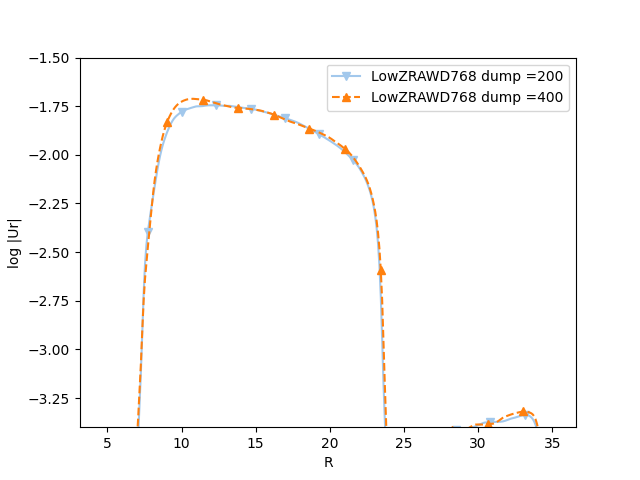

In [25]:
ifig = 3
plt.close(ifig)
plt.figure(ifig)
rp_set.rp_plot([200, 400], "|Ur|", ifig=ifig, logy=True, yylim=(-3.4, -1.5))

We can also _get_ the data and then constructing the plot by hand. 

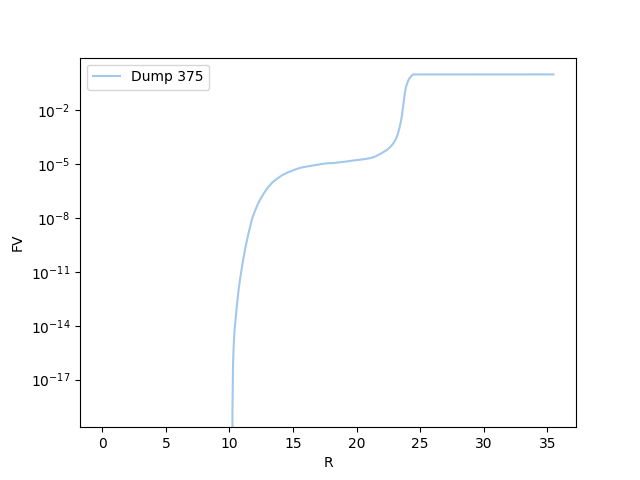

In [26]:
ifig = 2
plt.close(ifig)
plt.figure(ifig)

# get quantities, use high resolution!
fv = rp_set.get("FV", dump, resolution="h")
r = rp_set.get("R", dump, resolution="h")

# plot FV vs. R, semilog it
plt.semilogy(r, fv, color=cb(0)[2], linestyle=cb(0)[0], label="Dump " + str(dump))

# other details in a plot
plt.xlabel("R")
plt.ylabel("FV")
plt.legend()

There are numerous methods associated with the `RprofSet` class, for determining entrainment rates, diffusion coefficients and many other things. One of these determines the boundary of the convection zones from radial profiles in a number of ways. The method `RprofSet.bound_rad` finds the radius of the convective boundaruy. Of course, all methods such as `get`, `bound_rad` etc have doc strings that can be viewed like this: `rp_set.bound_rad?` (there `rp_set` is an instance of the `RprofSet` class).

If using `%pylab ipympl` the following will plot the coordinate of the convective boundary into the above figure.

In [27]:
# rp_set.bound_rad?

In [28]:
# where is the convective boundary?
conv_bound = rp_set.bound_rad(dump, 20, 30, var="FV", criterion="max_grad")
print(conv_bound)
ymin = 1.0e-2
ymax = 1.0
plt.vlines(
    conv_bound[0],
    ymin,
    ymax,
    color="k",
    lw=0.75,
    linestyle="--",
    label="Conv Bound max_grad FV",
)
plt.legend(loc=0)
xlim(23, 25)
ylim(ymin, ymax)

[24.06352604]


(0.01, 1.0)

In [29]:
# plt.figure(ifig)
# where is the convective boundary with value criterion?
conv_bound = rp_set.bound_rad(dump, 20, 30, var="FV", criterion="value", var_value=0.1)
print(conv_bound)
plt.vlines(
    conv_bound[0],
    ymin,
    ymax,
    color="k",
    lw=0.75,
    linestyle=":",
    label="Conv Bound FV=0.1",
)
plt.legend(loc=0)

[23.80085643]


## Computable quantities
As mentioned above the `RprofSet` class provides methods for many useful computable things via a method. Most computable quantities can be obtained with the method
```Python
RprofSet.compute(quantity)
```
where `quantity` is one of the things in `RprofSet.get_computable_quantities()`. These can also be directly plotted, for convenience with `RprofSet.rp_plot` as shown above. However, there is one caveat that needs to be explained. Some `computable_quantities` methods have arguments that can be quite important. Right now  these are not handed through by `RprofSet.compute`. Each computable quantitiy has its own `RprofSet` method, and unless you know that there are no important arguments it is best to check the doc string of the respective method. 

Below is an example. The Brunt is provided by `compute_N2`. It has an argument that specifies which EOS is to be used. The default is `radeos=True` meaning that the EOS including radiation pressure was used. But if you are plotting a run with ideal gas only, this will give the wrong result. This is demonstrated below for run `M200-1000xht-0xdiff-realEOS-768` which was computed with radiation pressure included, as opposed to `M35` which is ideal gas only. 

In [30]:
# run = 'M35-1536'
path = os.path.join(dir_repo, dir_project, run, "prfs")
rp_set = ppm.RprofSet(path)
rp_hst = rp_set.get_history()

3556 rprof files found in '/data/ASDR/PPMstar/LowZRAWD/N15-LowZRAWD-768-10x-burn-moms/prfs/.
Dump numbers range from 0 to 3555.


In [31]:
rp_set.compute_N2?

Signature: rp_set.compute_N2(fname, num_type='ndump', radeos=True)
Docstring: <no docstring>
File:      /user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py
Type:      method


In [32]:
N2_gas = rp_set.compute_N2(dump, radeos=False)
N2 = rp_set.compute("N2", dump)
R = rp_set.get("R", dump)

Quantity:  N2


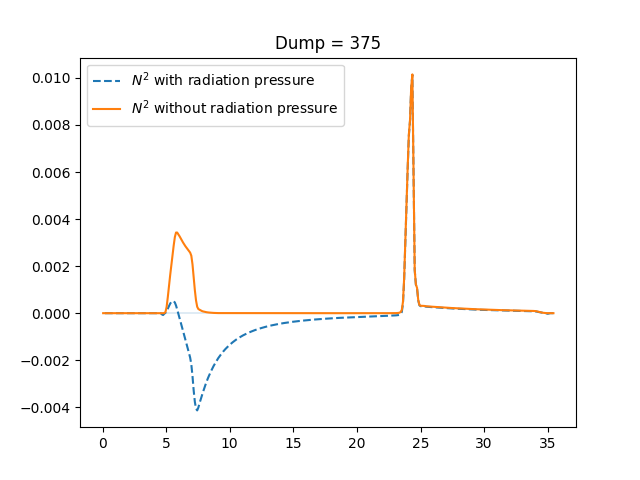

In [33]:
ifig = 7
close(ifig)
figure(ifig)
plot(R, N2, "--", label="$N^2$ with radiation pressure")
plot(R, N2_gas, "-", label="$N^2$ without radiation pressure")
legend()
title("Dump = " + str(dump))
hlines(0, 23, 0, lw=0.2)

## Examples

### Calculating a diffusion coefficent a la Jones+ 17
In our paper Jones etal. 2017 we proposed a simple recipy to derive D from radial velocity. Here is a demonstration how to calculate such a model from the `RProf` data.

In [34]:
# rp_set.bound_rad?

In [35]:
Hp = rp_set.compute("Hp", dump)
R = rp_set.get("R", dump)
Ur = rp_set.compute("|Ur|", dump)
rtop = rp_set.bound_rad(dump, 22.0, 27.0)

Quantity:  Hp
Quantity:  |Ur|


In [36]:
# find convection zone
inds_conv = np.where(R < rtop)[0]
mlen = Hp[inds_conv]
inds = np.where(rtop - R[inds_conv] < Hp[inds_conv])[0]
mlen[inds] = rtop - R[inds_conv][inds]

In [37]:
alpha_MLT = 1.6
D = (1.0 / 3) * alpha_MLT * mlen * Ur[inds_conv] * 1.0e16  # Mm**2/s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0, 0.5, '$\\log D / \\mathrm{[cm^2/s]}$')

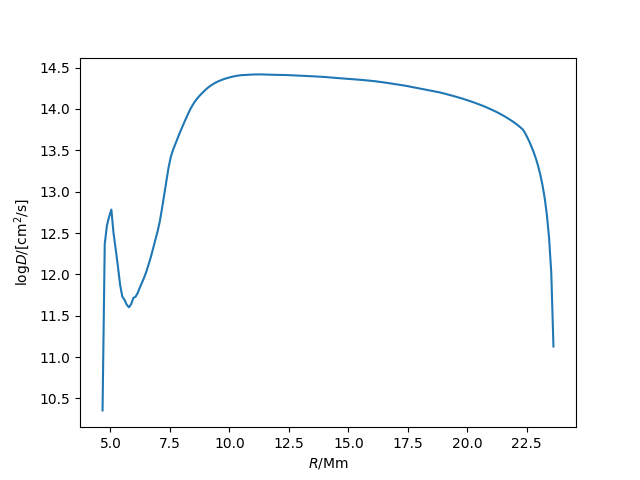

In [38]:
plt.close(119)
plt.figure(119)
plt.plot(R[inds_conv], np.log10(D))
plt.xlabel("$R/\mathrm{Mm}$")
plt.ylabel("$\log D / \mathrm{[cm^2/s]}$")

### Radial velocity profile plot
The `rp_plot` method plots all velocity components. This plot gives all three components in $\mathrm{km/s}$. 


/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9882: RuntimeWarning: divide by zero encountered in log10
  ything = np.log10(ything)
/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9882: RuntimeWarning: divide by zero encountered in log10
  ything = np.log10(ything)
/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9882: RuntimeWarning: divide by zero encountered in log10
  ything = np.log10(ything)
/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9882: RuntimeWarning: divide by zero encountered in log10
  ything = np.log10(ything)
/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9882: RuntimeWarning: divide by zero encountered in log10
  ything = np.log10(ything)
/user/niagara_scratch_fherwig/repos/PyPPM/ppmpy/ppm.py:9882: RuntimeWarning: divide by zero encountered in log10
  ything = np.log10(ything)


19.144761693490473

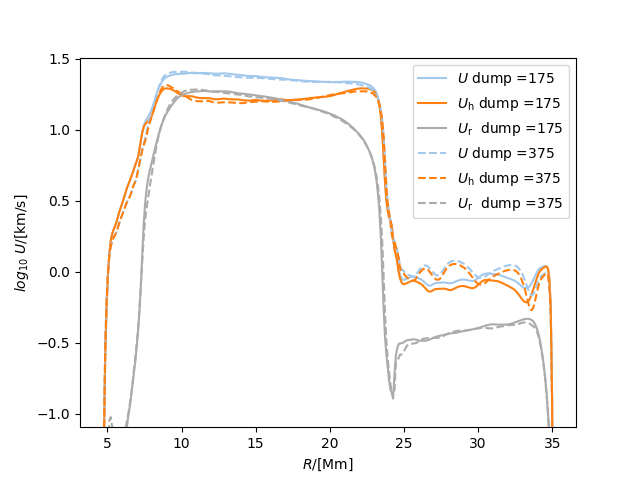

In [39]:
rp_set.plot_vrad_prof([dump - 200, dump], ifig=102)

### Time evolution plot
This plot should probably go into a method.

In [40]:
# define dump range, defaults to all dumps, using every 10th
# use a larger sparse factor initially for speedy "first look"
# then refine
dump_min, dump_max, sparse = None, None, 20

# variable to be shown
var = "|U|"

# radial range over which to average
rmin, rmax = 12, 16

# plotting parameters
ylim1, ylim2 = None, None
logy = False
save_pdf = False
tvar = "time(mins)"
NDump = rp_hst.get("NDump")
dumps = NDump[dump_min:dump_max:sparse]

Star time in minutes between dumps: 0.46


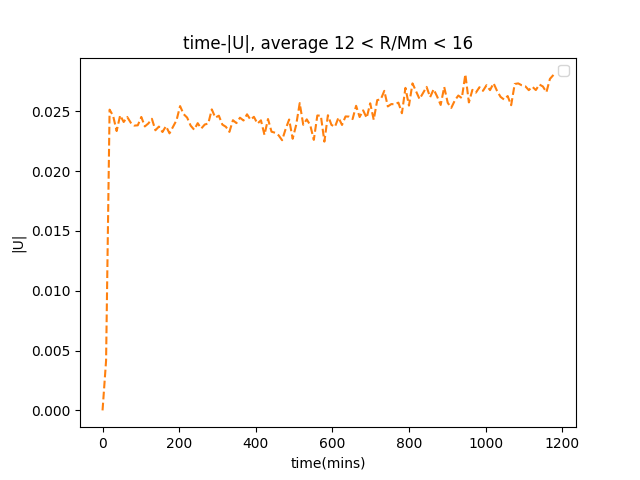

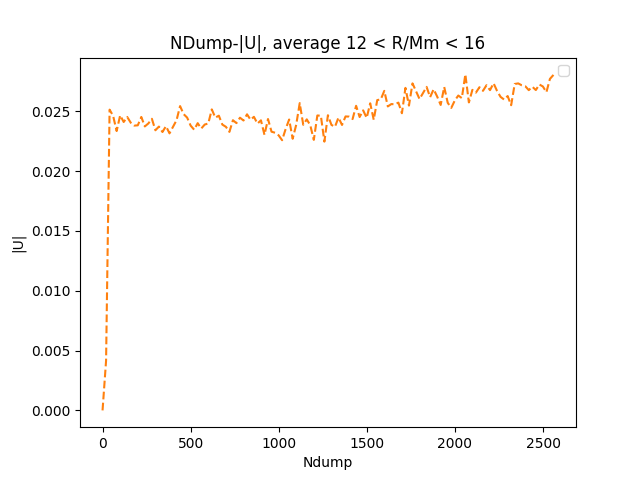

In [41]:
timemins = rp_hst.get(tvar)
print(
    "Star time in minutes between dumps: {:.2f}".format(
        np.average(np.diff(timemins)[np.where(np.diff(timemins) > 0)])
    )
)

# take average of variable between two radii and plot as function of time
things = []
times = []
R = rp_set.get("R", NDump[0])
for dump in dumps:
    thing = rp_set.get(var, dump)
    times.append(rp_set.get("t", fname=dump) / 60.0)
    things.append(np.average(thing[(R > rmin) * (R < rmax)]))
vars = np.array(things)
times = np.array(times)

i = 1
if logy:
    vars = log10(vars)
plt.close(1093)
plt.figure(1093)
plt.plot(times, vars, utils.linestylecb(i)[0], color=utils.colourblind(i), label=None)
plt.ylabel(var)
plt.xlabel(tvar)
plt.title("time-" + var + ", average " + str(rmin) + " < R/Mm < " + str(rmax))
plt.legend()

plt.close(1092)
plt.figure(1092)
plt.plot(dumps, vars, utils.linestylecb(i)[0], color=utils.colourblind(i), label=None)
plt.ylabel(var)
plt.xlabel("Ndump")
plt.title("NDump-" + var + ", average " + str(rmin) + " < R/Mm < " + str(rmax))
plt.legend()

if save_pdf:
    figure(1093)
    ylim(ylim1, ylim2)
    tight_layout()
    savefig("time-" + var + ".pdf")
    figure(1092)
    ylim(ylim1, ylim2)
    tight_layout()
    savefig("NDump-" + var + ".pdf")